In [402]:

import panel as pn
import pandas as pd
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer
# MAKE sure to cite/reference
# https://huggingface.co/whaleloops/phrase-bert
Bertmodel = SentenceTransformer('whaleloops/phrase-bert')


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Print some sample compressions

In [389]:
df = pd.read_csv('CompressedStatements.csv',names=['original','compressed'])
df=df.iloc[1:]

df = df.reset_index(drop=True)
df.head()


,original,compressed
0,A little. I am starting to follow it closer now,Learning and understanding technology.
1,“I was following the election more closely dur...,"Following election decreased, discouraged."
2,“I have been watching this election pretty clo...,Interested in politics and election.
3,“I've been following it a bit. I'm mostly fol...,"\nElection horror, manipulation feared."
4,[What scares you?] “Neither candidate seems li...,Neither candidate trustworthy or competent.


In [78]:
df2 = pd.read_csv('embeddings.csv')#,names=['original','compressed'])
df2 = df2.drop(df2.columns[0], axis=1)
df2 = df2.reset_index(drop=True)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.044091,-0.529590,1.433734,-0.565854,0.397295,-0.164266,0.736751,0.446946,-0.544295,-0.825446,...,0.644782,-0.324485,-0.211911,-0.456069,-0.388565,-0.770680,-0.077804,0.526447,-0.174525,0.293448
1,-0.150411,-0.227297,0.320511,-0.412093,0.591298,0.550049,0.154659,0.297672,-0.682904,-0.028275,...,-0.128721,0.410224,-0.323907,-0.422622,0.121883,-1.233142,-0.558737,0.532467,-0.473351,0.061781
2,0.383621,-0.143026,0.616748,-0.219761,0.470498,0.329369,0.335240,0.946442,-0.705677,0.029495,...,-0.365386,0.102574,0.137269,-1.125526,-0.294477,-0.708387,0.211686,0.748592,-0.174640,0.091173
3,0.368019,-0.345937,0.422278,-0.024421,0.138336,0.382220,0.602218,0.112474,-0.623114,0.349583,...,-0.171140,0.252572,-0.387189,-0.901990,0.016953,-1.092223,-0.139505,0.227529,-0.799491,0.100776
4,-0.169572,0.172225,-0.439779,0.181142,0.638485,0.112545,1.163886,0.538473,-0.442709,0.052220,...,-0.387161,-0.309706,-0.020605,-1.769614,-0.349239,-0.561466,0.001264,0.550609,-0.079606,-0.323394


Token Embedding Portion

#### Create Embeddings of Compressed Text

In [117]:
# Full Embeddings

embeddings = []
phraselist = []
for i in range(len(df)):
  compressedText=df.iloc[i][1]
  if i//100:
    print(100*i/len(df))
  ct_embs = model.encode([compressedText])
  [t1] = ct_embs
  embeddings.append(t1)
  phraselist.append(compressedText)


#### Create Embeddings of Original Text

In [455]:
# Original Embeddings

embeddings = []
phraselist = []
for i in range(len(df)):
  originalText=df['original'].iloc[i][:]
  ct_embs = Bertmodel.encode(originalText)
  embeddings.append(ct_embs)
  phraselist.append(originalText)


#### Create Similarity Matrix

In [156]:
import torch
from torch import nn
import numpy as np
cos_sim = nn.CosineSimilarity(dim=0)

similarityMatrix = np.ones((len(df2),len(df2)))

for i in range(len(df2)):
  # if i //10:
  #   print(i)
  for j in range(i+1,len(df2)):
    # print(phraselist[i],phraselist[j])
    p1 = df2.iloc[i]
    p2 = df2.iloc[j]
    sim = cos_sim( torch.tensor(p1), torch.tensor(p2))
    similarityMatrix[i,j] = sim
    similarityMatrix[j,i] = sim


In [408]:
# Print a two rows that have high siilarity

print(df['original'][20])
print(df['original'][922])


I have been following the election race on and off throughout. I especially love watching the debates between candidates. I have to say that I have followed this election race more than I had prior ones. Definitely more entertaining due to Trump and his eccentric and brash point of view. Trump may not have a history in politics but I feel he has a more of a realistic and relatable direction. Trump brings a more outside perspective as opposed to this 'stepford wives' kind of mold politician seem to encompass these days. He challenged his opponents and caught them off guard at times. Trump is not afraid to speak up and challenge. Now with that being said he may tend to stick his foot in his mouth at times and say completely racist comments I sometimes find myself torn between cringing and somewhat applauding him for not holding back and just unleashing.
I spoke with my husband and he and I see eye to eye with this whole campaign/election. He believes Mr. Trump has been very uncivil throu

In [24]:
# # Save for use later
# pd.DataFrame(phraselist).to_csv('compressedPhrases.csv')
# pd.DataFrame(embeddings).to_csv('embeddings.csv')
# pd.DataFrame(similarityMatrix).to_csv('similarityMatrix.csv')

# Load saved stuff
# phraselist = pd.read_csv('compressedPhrases.csv')
# embeddings = pd.read_csv('embeddings.csv')
# similarityMatrix = pd.read_csv('similarityMatrix.csv')


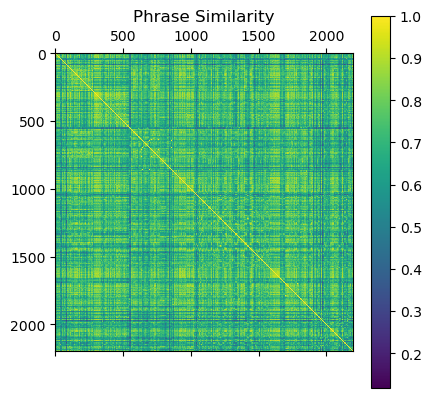

In [409]:
import matplotlib.pyplot as plt

plt.matshow(similarityMatrix)
plt.colorbar()
plt.title('Phrase Similarity')
plt.show()


### Clustering approaches

### Hierarchial Clustering

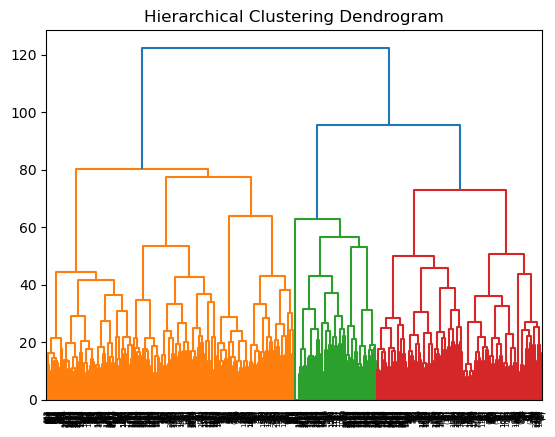

In [410]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(embeddings)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=10)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### K-means

#### Cluster to Cluster distance

{0: 324, 1: 365, 2: 428, 3: 216, 4: 523, 5: 339}
[[ 0.07459867  0.27709257 -0.39950777 ...  0.46584907 -0.55064225
   0.07525127]
 [-0.18063478  0.18977392 -0.28148247 ...  0.69220711 -0.32265257
   0.13879328]
 [ 0.08908279  0.46326081 -0.1825207  ...  0.9134572  -0.11469816
   0.05418323]
 [-0.02818684  0.18025282 -0.27118795 ...  0.51712678 -0.37089753
   0.1526069 ]
 [ 0.04463261  0.0363384   0.04358337 ...  0.7323687  -0.38312434
   0.21517033]
 [ 0.01851245  0.29016176 -0.10685999 ...  0.69661267 -0.32197048
   0.14877871]]
Cluster  1
['How will you provide a climate in which both parties can work together EFFECTIVELY?', 'Dear Candidate, I think both of you should focus on what is wrong with our country and try to stay out of the politics of other countries.  We are sending money and there are homeless and starving citizens (including veterans - which is a total disgrace).', 'Please do not legalize gay marriage, marijuana, or transgender bathroom laws. Gay people are not the same

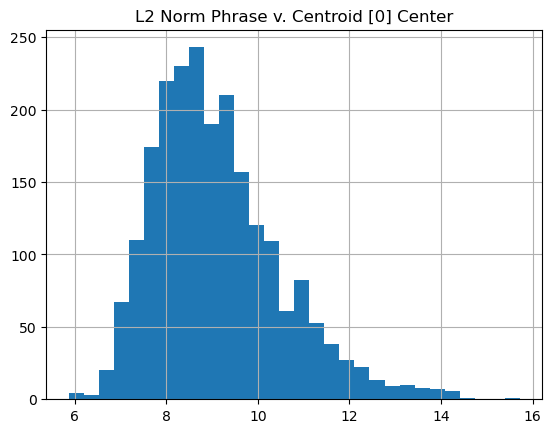

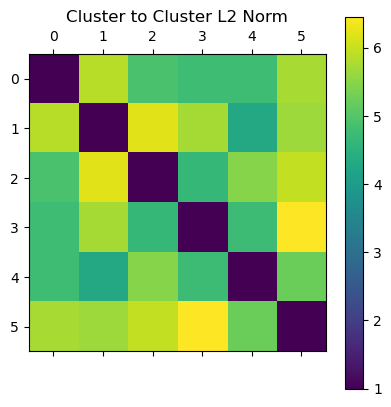

In [391]:
num_clusters=6

model_km = KMeans(n_clusters=num_clusters, n_init="auto",random_state=42).fit(embeddings)
labels = model_km.labels_
unique, counts = np.unique(labels, return_counts = True)
print(dict(zip(unique, counts)))

print(
model_km.cluster_centers_
)


clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(labels):
    clustered_sentences[cluster_id].append(phraselist[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")


c=0
for ee in range(len(model_km.cluster_centers_)):
  distances=[]
  for e in embeddings:
    a = model_km.cluster_centers_[ee]
    distances.append(np.linalg.norm(a-e))
  df['dist2_'+str(c)]=distances
  c+=1
plt.hist(distances,bins=30)
plt.title('L2 Norm Phrase v. Centroid [0] Center')
plt.grid()


clusterDist = np.ones((num_clusters,num_clusters))
for i in range(num_clusters):
  for j in range(i+1,num_clusters):
    a = model_km.cluster_centers_[i]
    e = model_km.cluster_centers_[j]
    clusterDist[i,j] = np.linalg.norm(a-e)
    clusterDist[j,i] = np.linalg.norm(a-e)

clusterDist

plt.matshow(clusterDist)
plt.colorbar()
plt.title('Cluster to Cluster L2 Norm')
plt.show()

#### Population Analysis

In [493]:
# Median

print('Median')
for i in range(6):

    median = df[df['Kmeans_cluster']==i]['dist2_0'].median()
    df_closest = df.iloc[(df['dist2_0']-median).abs().argsort()[:1]]
    print(df_closest.original.values)

print('0.1 quantile')
for i in range(6):

    low = df[df['Kmeans_cluster']==i]['dist2_0'].quantile(.00)
    df_closest = df.iloc[(df['dist2_0']-low).abs().argsort()[:1]]
    print(df_closest.original.values)

print('0.9 quantile')
for i in range(6):

    high = df[df['Kmeans_cluster']==i]['dist2_0'].quantile(.55)
    df_closest = df.iloc[(df['dist2_0']-high).abs().argsort()[:1]]
    print(df_closest.original.values)

Median
['agine you are candidly talking to a friend who has never followed politics and has no political leanings, they are essentially a blank slate but also a person of faith. Tell them why they should also support the same position you do.']
["I can't think of a specific example but the tone is that Clinton doesn't keep her promises or care about the people, just furthering herself. Trump's stand on immigration is helping increase his popularity."]
['[How do you think you will follow the political exchanges as the election nears? Do you plan to vote?] I will continue to follow the debates and the stands of the two candidates and I do plan on voting. I am an avid supporter of voting rights. I am unsure about how I plan to vote, but I will not be voting for Trump.']
["To me a person of faith has values and morals. He shouldn't be dishonest and should be caring of the public."]
['I consider abortion murder. A government that promotes mass murder is not a moral government. (Female)']
["

Text(0.5, 0, 'Quantile')

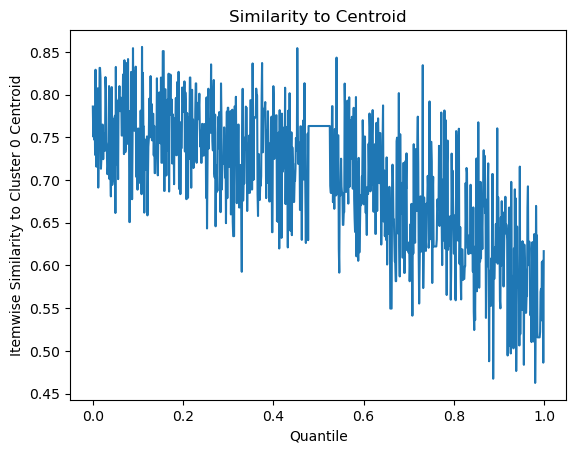

In [487]:
sims
plt.plot([i/1000 for i in range(1000)],sims)
np.array(_Vprop[0])

plt.title('Similarity to Centroid')
plt.ylabel('Itemwise Similarity to Cluster 0 Centroid')
plt.xlabel('Quantile')

In [505]:
ProposedPhrase = ["Addressing the complexities of immigration, there's a call for a more humane approach to citizenship, discouraging illegal entry while critiquing the deportation-focused stance. Simultaneously, a broader perspective is sought in American politics, aiming for a change in its divisive and bitter nature, with a focus on structural reform and a demand for accountability from those in power."]
proposedEmbedded = Bertmodel.encode(ProposedPhrase)

low = df[df['Kmeans_cluster']==0]['dist2_3'].quantile(.0)
low_closest = df.iloc[(df['dist2_0']-low).abs().argsort()[:1]]
high = df[df['Kmeans_cluster']==0]['dist2_3'].quantile(.55)
high_closest = df.iloc[(df['dist2_0']-high).abs().argsort()[:1]]
mid = df[df['Kmeans_cluster']==0]['dist2_3'].quantile(.99)
mid_closest = df.iloc[(df['dist2_0']-mid).abs().argsort()[:1]]

print(low_closest['original'].values)
lowEmbedded = Bertmodel.encode(low_closest['original'].values)

print(high_closest['original'].values)
highEmbedded = Bertmodel.encode(high_closest['original'].values)

print(mid_closest['original'].values)
midEmbedded = Bertmodel.encode(mid_closest['original'].values)

cos_sim = nn.CosineSimilarity(dim=0)

lowVprop = cos_sim(torch.tensor(proposedEmbedded.T),torch.tensor(lowEmbedded.T))
highVprop = cos_sim(torch.tensor(proposedEmbedded.T),torch.tensor(highEmbedded.T))
lowVhigh = cos_sim(torch.tensor(lowEmbedded.T),torch.tensor(highEmbedded.T))
midComp = cos_sim(torch.tensor(midEmbedded.T),torch.tensor(proposedEmbedded.T))


print(lowVprop,highVprop,lowVhigh, midComp)

# sims=[]
# for i in range(1000):
#     i/=1000
#     derp = df[df['Kmeans_cluster']==0]['dist2_0'].quantile(i)
#     _closest = df.iloc[(df['dist2_0']-derp).abs().argsort()[:1]]
#     _Embedded = Bertmodel.encode(_closest['original'].values)
#     _Vprop = cos_sim(torch.tensor(proposedEmbedded.T),torch.tensor(_Embedded.T))
#     sims.append(np.array(_Vprop[0]))

# sims
# plt.plot(range(0,1,.001),sims)
# np.array(_Vprop[0])



["I think that people need to stop entering this country illegally, and go through the proper channels to gain citizenship. I disagree with Trump's idea of deporting all illegals and building a wall. It just seems childish. I feel a decent approach would be to make citizenship available to illegals without fear of immediate deportation. Also, look into the reasons why so many people find it necessary to enter this country illegally. (Female)"]
['American politics has become hate filled and bitter this country need a change in structure with those in power taking away rights but thinking they do not have to following the same laws and personal attacks running rampant. (Male)']
["Somewhat cooler. I've seen all of these clips before but it's always horrible seeing them again."]
tensor([0.7702]) tensor([0.8172]) tensor([0.7942]) tensor([0.4357])


In [333]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(embeddings)

pca.explained_variance_ratio_[:3]


array([0.08896645, 0.06947355, 0.06075615])

### Clusters v. sse (K-means)

justification for using 6 clusters vs. more/less

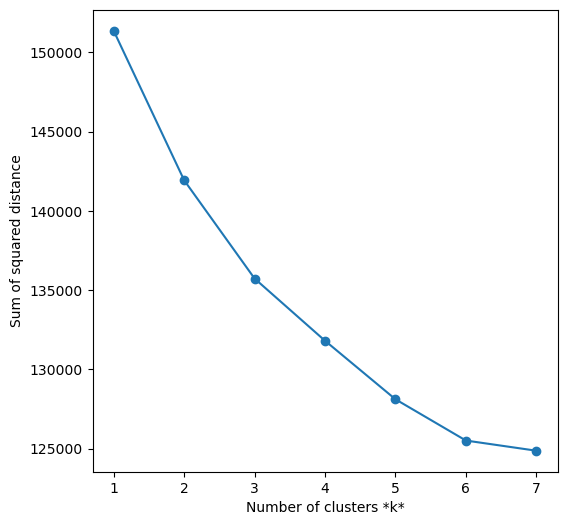

In [392]:

# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 8)) # 22

for k in list_k:
    km = KMeans(n_clusters=k, n_init="auto",random_state=42)
    km.fit(embeddings)
    sse.append(km.inertia_)
km.score
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Text(0.5, 1.0, 'Clusters')

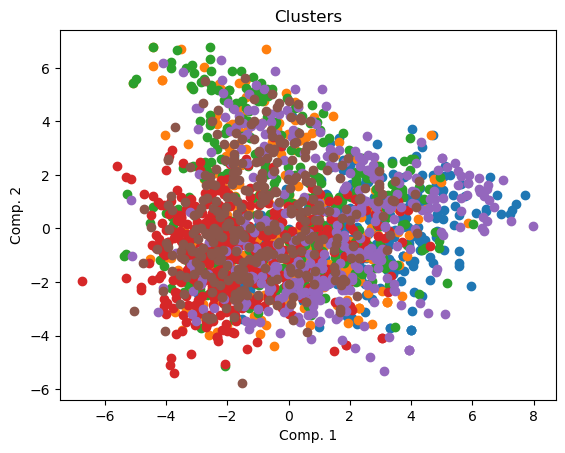

In [438]:
# df['cluster'] = model_km.labels_

xt = pca.fit_transform(embeddings)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in range(6):
    derp = df.iloc[df['Kmeans_cluster'].values==i].index
    plt.scatter(xt[derp,0],xt[derp,1],c=cols[i])
plt.xlabel('Comp. 1')
plt.ylabel('Comp. 2')
plt.title('Clusters')


In [394]:
num_clusters=6

model_km = KMeans(n_clusters=num_clusters, n_init="auto",random_state=42).fit(embeddings)
labels = model_km.labels_
unique, counts = np.unique(labels, return_counts = True)
print(dict(zip(unique, counts)))

print(
model_km.cluster_centers_
)


clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(labels):
    clustered_sentences[cluster_id].append(phraselist[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

{0: 324, 1: 365, 2: 428, 3: 216, 4: 523, 5: 339}
[[ 0.07459867  0.27709257 -0.39950777 ...  0.46584907 -0.55064225
   0.07525127]
 [-0.18063478  0.18977392 -0.28148247 ...  0.69220711 -0.32265257
   0.13879328]
 [ 0.08908279  0.46326081 -0.1825207  ...  0.9134572  -0.11469816
   0.05418323]
 [-0.02818684  0.18025282 -0.27118795 ...  0.51712678 -0.37089753
   0.1526069 ]
 [ 0.04463261  0.0363384   0.04358337 ...  0.7323687  -0.38312434
   0.21517033]
 [ 0.01851245  0.29016176 -0.10685999 ...  0.69661267 -0.32197048
   0.14877871]]
Cluster  1
['How will you provide a climate in which both parties can work together EFFECTIVELY?', 'Dear Candidate, I think both of you should focus on what is wrong with our country and try to stay out of the politics of other countries.  We are sending money and there are homeless and starving citizens (including veterans - which is a total disgrace).', 'Please do not legalize gay marriage, marijuana, or transgender bathroom laws. Gay people are not the same

In [396]:
# https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/clustering/agglomerative.py

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

embedder = SentenceTransformer('paraphrase-MiniLM-L6-v2')

corpus = df['compressed']

corpus_embeddings = embedder.encode(corpus)

# Perform kmean clustering
num_clusters = 6
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")


df['Kmeans_cluster'] = cluster_assignment
####
# research how -- clustering_model.cluster_centers_ -- can be used to decode what the centroid statement is.
# Look at the middle 60% also.

####

/Users/alecjeffery/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster  1
[' Christian values guide woman’s vote.', '\nCandidate must demonstrate biblical knowledge.', ' Faith plays an important role.\nFaith important in decision-making process.', ' Diversity of religions accepted.', ' Separation of church and state respected.', ' Human values trump religious beliefs.', '\nBeliefs important, but actions moreso.', ' Religion affects decision-making.', ' President needs God-guided conscience', ' Respect for religious choices.', ' President share faith values important.', " Candidates' faith important to me.", ' Faith matters, but actions more.', ' Religion forms morals and decisions.', ' Western religions preferred to avoid conflict.', " Candidate's faith important to voter.", ' Christian values, human rights, access, dignity, legality.', " Candidate's faith is important.", ' Both candidates are nominal Christians.', ' Christian values sought in president.', " Faith shapes one's integrity and morals.", ' Religion matters in politics.', ' Religion an

### Agglomerative

In [397]:
"""
This is a simple application for sentence embeddings: clustering

Sentences are mapped to sentence embeddings and then agglomerative clustering with a threshold is applied.
"""
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np

embedder = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Corpus with example sentences
corpus = df['compressed']
corpus_embeddings = embedder.encode(corpus)

# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

# Perform kmean clustering
clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=4.5) #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

df['AgglomerativeClusters'] = cluster_assignment

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in clustered_sentences.items():
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
[' Learning and understanding technology.', ' Listen, analyze, and double check.', ' Follow issues, education, candidates, economical, social.', ' Trusting news from friends.', " Human influenced by peers' opinions.", ' America voted for Trump and Sanders.', ' Researches, tracks, news, social media, friends.', ' Shock, entertainment, more invested, Trump, nomination', '  Invested due to increased maturity.', ' Paying close attention due to importance.', ' Duty as citizen to vote.', ' Got involved after Orlando shootings.', ' Human has been monitoring.', ' Little interest in following news.', ' Research, tune out "lies", informed decision.', ' Human disenchanted with government corruption.', ' Information is always available.\n\nInformation always available for learning.', ' Skills, leadership, policies, realistic, decision.', ' Lead by example, unity for all.', ' Be accepting, dedicated to all Americans.', '\n\n"Stand for greater good, not money."', ' Balance budget, resourc

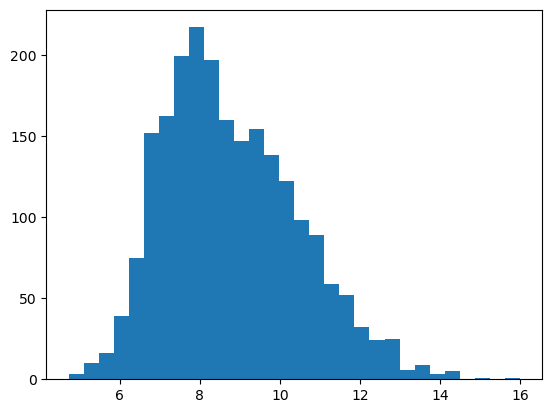

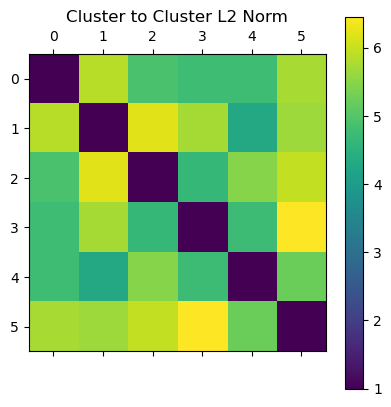

In [275]:
distances = []

for e in embeddings:
  a = model_km.cluster_centers_[0]
  distances.append(np.linalg.norm(a-e))

plt.hist(distances,bins=30)


clusterDist = np.ones((num_clusters,num_clusters))
for i in range(num_clusters):
  for j in range(i+1,num_clusters):
    a = model_km.cluster_centers_[i]
    e = model_km.cluster_centers_[j]
    clusterDist[i,j] = np.linalg.norm(a-e)
    clusterDist[j,i] = np.linalg.norm(a-e)

clusterDist

plt.matshow(clusterDist)
plt.colorbar()
plt.title('Cluster to Cluster L2 Norm')
plt.show()
